# EDA and Data Cleaning


Discussion in Section 2 of attached report

In [1]:
# Import libraries to be used in the task
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ignore warnings - warning were used in the development of the notebook, and removed in the final version
import warnings
warnings.filterwarnings('ignore')

### First dataset - GDP Spend

In [2]:
#View first dataframe

construction_gdp = pd.read_csv("construction_gdp.csv")
construction_gdp.info()
construction_gdp.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     756 non-null    object 
 1   LAST UPDATE  756 non-null    object 
 2   freq         756 non-null    object 
 3   unit         756 non-null    object 
 4   asset10      756 non-null    object 
 5   geo          756 non-null    object 
 6   TIME_PERIOD  756 non-null    int64  
 7   OBS_VALUE    756 non-null    float64
 8   OBS_FLAG     32 non-null     object 
dtypes: float64(1), int64(1), object(7)
memory usage: 53.3+ KB


(756, 9)

In [3]:
construction_gdp.head()

,DATAFLOW,LAST UPDATE,freq,unit,asset10,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:TIPSNA50(1.0),15/05/23 23:00:00,A,PC_GDP,N111G,AT,1995,6.5,NaN
1,ESTAT:TIPSNA50(1.0),15/05/23 23:00:00,A,PC_GDP,N111G,AT,1996,6.5,NaN
2,ESTAT:TIPSNA50(1.0),15/05/23 23:00:00,A,PC_GDP,N111G,AT,1997,6.3,NaN
3,ESTAT:TIPSNA50(1.0),15/05/23 23:00:00,A,PC_GDP,N111G,AT,1998,6.0,NaN
4,ESTAT:TIPSNA50(1.0),15/05/23 23:00:00,A,PC_GDP,N111G,AT,1999,5.7,NaN


In [4]:
construction_gdp.tail()

,DATAFLOW,LAST UPDATE,freq,unit,asset10,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
751,ESTAT:TIPSNA50(1.0),15/05/23 23:00:00,A,PC_GDP,N111G,SK,2018,3.3,NaN
752,ESTAT:TIPSNA50(1.0),15/05/23 23:00:00,A,PC_GDP,N111G,SK,2019,3.3,NaN
753,ESTAT:TIPSNA50(1.0),15/05/23 23:00:00,A,PC_GDP,N111G,SK,2020,3.8,NaN
754,ESTAT:TIPSNA50(1.0),15/05/23 23:00:00,A,PC_GDP,N111G,SK,2021,4.0,NaN
755,ESTAT:TIPSNA50(1.0),15/05/23 23:00:00,A,PC_GDP,N111G,SK,2022,4.3,NaN


In [5]:
#Identify columns that can be removed

construction_gdp.nunique()

DATAFLOW         1
LAST UPDATE      1
freq             1
unit             1
asset10          1
geo             27
TIME_PERIOD     28
OBS_VALUE      103
OBS_FLAG         2
dtype: int64

In [6]:
# check that all EU member states are accounted for in the data

construction_gdp["geo"].unique()

array(['AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'EL', 'ES', 'FI',
       'FR', 'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'MT', 'NL', 'PL',
       'PT', 'RO', 'SE', 'SI', 'SK'], dtype=object)

In [7]:
#investigate possible issue with missing data, as flagged in the datasource

construction_gdp["OBS_FLAG"].unique()

array([nan, 'p', 'b'], dtype=object)

In [8]:
# clean dataframe

columns_to_drop = [0,1,2,3,4,8]
construction_gdp_drop = construction_gdp.drop(construction_gdp.columns[columns_to_drop], axis=1)

In [9]:
construction_gdp_drop.head()

,geo,TIME_PERIOD,OBS_VALUE
0,AT,1995,6.5
1,AT,1996,6.5
2,AT,1997,6.3
3,AT,1998,6.0
4,AT,1999,5.7


In [10]:
#rename column to avoid duplication when merging with other dfs

construction_gdp_drop = construction_gdp_drop.rename(columns={"OBS_VALUE": "GDP_SPEND"})

In [11]:
construction_gdp_drop.describe()

,TIME_PERIOD,GDP_SPEND
count,756.000000,756.000000
mean,2008.500000,4.421429
std,8.083095,2.090506
min,1995.000000,0.400000
25%,2001.750000,2.800000
50%,2008.500000,4.200000
75%,2015.250000,5.700000
max,2022.000000,13.500000


### Initial visualisations

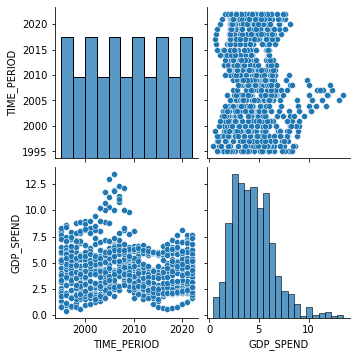

In [12]:

sns.pairplot(construction_gdp_drop)

<AxesSubplot:xlabel='TIME_PERIOD', ylabel='GDP_SPEND'>

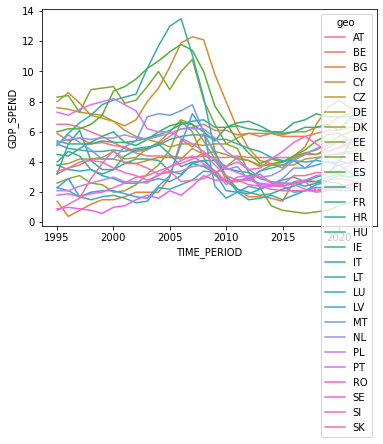

In [13]:
sns.lineplot(x="TIME_PERIOD", y="GDP_SPEND",hue="geo", data=construction_gdp_drop)

<AxesSubplot:xlabel='TIME_PERIOD', ylabel='GDP_SPEND'>

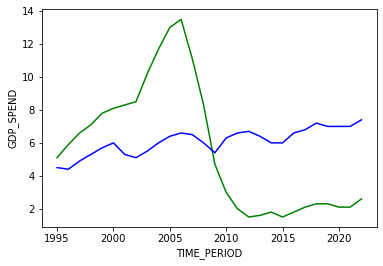

In [14]:
# create and view separate dataframes for countries of interest
construction_gdp_IE = construction_gdp_drop[construction_gdp_drop["geo"] == "IE"]
construction_gdp_FI = construction_gdp_drop[construction_gdp_drop["geo"] == "FI"]

sns.lineplot(x="TIME_PERIOD", y="GDP_SPEND",color="green", data=construction_gdp_IE)
sns.lineplot(x="TIME_PERIOD", y="GDP_SPEND",color="blue", data=construction_gdp_FI)


In [15]:
#create a dataframe for and view the most recent data

construction_gdp_2022 = construction_gdp_drop[construction_gdp_drop["TIME_PERIOD"] == 2022]
construction_gdp_2022.head()

,geo,TIME_PERIOD,GDP_SPEND
27,AT,2022,5.2
55,BE,2022,6.3
83,BG,2022,2.5
111,CY,2022,7.6
139,CZ,2022,4.8


<AxesSubplot:xlabel='geo', ylabel='GDP_SPEND'>

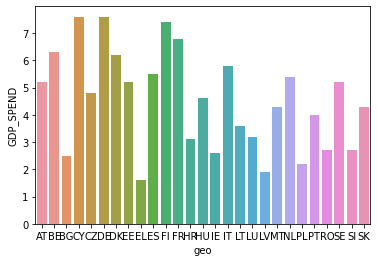

In [16]:
sns.barplot(x="geo", y="GDP_SPEND",data=construction_gdp_2022)

### Second dataset - House Price Index

In [17]:
#View dataframe

house_price_index = pd.read_csv("house_price_index.csv")
house_price_index.info()
house_price_index.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1645 entries, 0 to 1644
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     1645 non-null   object 
 1   LAST UPDATE  1645 non-null   object 
 2   freq         1645 non-null   object 
 3   unit         1645 non-null   object 
 4   geo          1645 non-null   object 
 5   TIME_PERIOD  1645 non-null   int64  
 6   OBS_VALUE    1645 non-null   float64
 7   OBS_FLAG     509 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 102.9+ KB


(1645, 8)

In [18]:
house_price_index.head()

,DATAFLOW,LAST UPDATE,freq,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:TIPSHO20(1.0),04/04/2023 11:00,A,INX_A_AVG,AT,2000,60.36,e
1,ESTAT:TIPSHO20(1.0),04/04/2023 11:00,A,INX_A_AVG,AT,2001,60.82,e
2,ESTAT:TIPSHO20(1.0),04/04/2023 11:00,A,INX_A_AVG,AT,2002,61.21,e
3,ESTAT:TIPSHO20(1.0),04/04/2023 11:00,A,INX_A_AVG,AT,2003,61.36,e
4,ESTAT:TIPSHO20(1.0),04/04/2023 11:00,A,INX_A_AVG,AT,2004,60.21,e


In [19]:
# identify what is not needed and clean, as with first df

house_price_index.nunique()

DATAFLOW          1
LAST UPDATE       1
freq              1
unit              3
geo              27
TIME_PERIOD      23
OBS_VALUE      1019
OBS_FLAG          4
dtype: int64

In [20]:
house_price_index["unit"].unique()

array(['INX_A_AVG', 'PCH_3Y', 'RCH_A_AVG'], dtype=object)

In [21]:
house_price_index_dropr = house_price_index.drop(house_price_index[(house_price_index["unit"] == "PCH_3Y") |  (house_price_index["unit"] =="RCH_A_AVG")].index)

In [22]:
house_price_index_dropr["OBS_FLAG"].unique()

array(['e', nan, 'p', 'b', 'bp'], dtype=object)

In [23]:
columns_to_drop = [0,1,2,3,7]
house_price_index_drop = house_price_index_dropr.drop(house_price_index_dropr.columns[columns_to_drop], axis=1)

In [24]:
house_price_index_drop.head()

,geo,TIME_PERIOD,OBS_VALUE
0,AT,2000,60.36
1,AT,2001,60.82
2,AT,2002,61.21
3,AT,2003,61.36
4,AT,2004,60.21


In [25]:
house_price_index_drop = house_price_index_drop.rename(columns={"OBS_VALUE": "PRICE_INDEX"})

In [26]:
house_price_index_drop.describe()

,TIME_PERIOD,PRICE_INDEX
count,584.000000,584.000000
mean,2011.546233,103.217449
std,6.450332,30.661723
min,2000.000000,29.330000
25%,2006.000000,87.452500
50%,2012.000000,100.685000
75%,2017.000000,118.602500
max,2022.000000,253.580000


### Merge dfs

In [27]:
#merge on price index df, to start from the year 2000

merge_df = pd.merge(construction_gdp_drop, house_price_index_drop, how="right", on = ["geo", "TIME_PERIOD"])
merge_df.describe()

,TIME_PERIOD,GDP_SPEND,PRICE_INDEX
count,584.000000,584.000000,584.000000
mean,2011.546233,4.494007,103.217449
std,6.450332,2.097262,30.661723
min,2000.000000,0.600000,29.330000
25%,2006.000000,2.800000,87.452500
50%,2012.000000,4.200000,100.685000
75%,2017.000000,5.700000,118.602500
max,2022.000000,13.500000,253.580000


In [28]:
merge_df.head()

,geo,TIME_PERIOD,GDP_SPEND,PRICE_INDEX
0,AT,2000,5.3,60.36
1,AT,2001,4.9,60.82
2,AT,2002,4.6,61.21
3,AT,2003,4.4,61.36
4,AT,2004,4.4,60.21


In [29]:
merge_df.nunique()

geo             27
TIME_PERIOD     23
GDP_SPEND       95
PRICE_INDEX    537
dtype: int64

In [30]:
### Visualise merged df

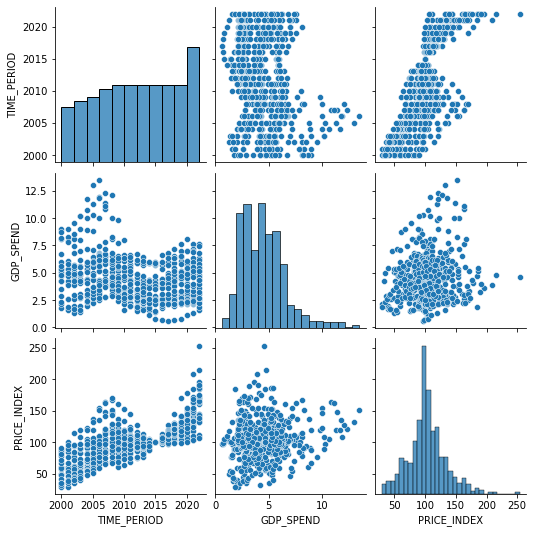

In [31]:
sns.pairplot(merge_df)

<AxesSubplot:xlabel='TIME_PERIOD', ylabel='PRICE_INDEX'>

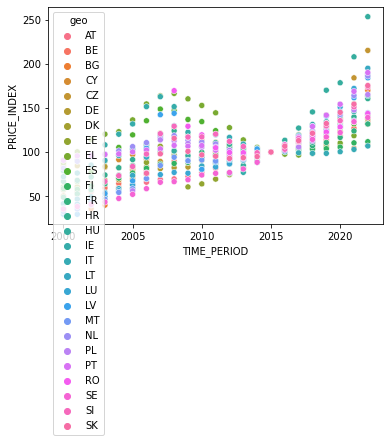

In [32]:
sns.scatterplot(x="TIME_PERIOD", y="PRICE_INDEX",hue="geo", data=merge_df)

<AxesSubplot:xlabel='GDP_SPEND', ylabel='PRICE_INDEX'>

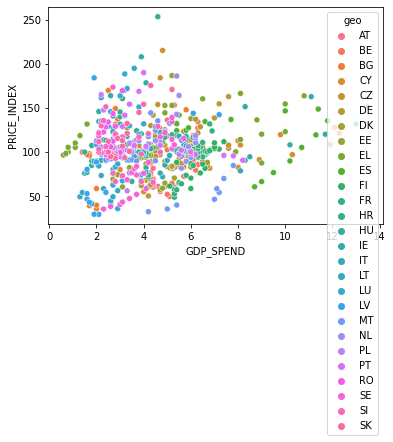

In [33]:
sns.scatterplot(x="GDP_SPEND", y="PRICE_INDEX",hue="geo", data=merge_df)

In [34]:
merge_IE = merge_df[merge_df["geo"] == "IE"]

<AxesSubplot:xlabel='TIME_PERIOD', ylabel='PRICE_INDEX'>

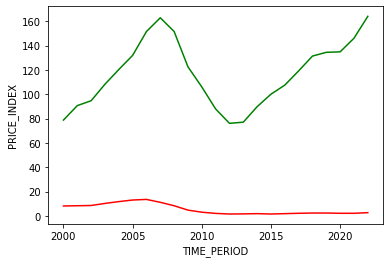

In [35]:
sns.lineplot(x="TIME_PERIOD", y="PRICE_INDEX",color="green", data=merge_IE)
sns.lineplot(x="TIME_PERIOD", y="GDP_SPEND",color="red", data=merge_IE)


<AxesSubplot:xlabel='TIME_PERIOD', ylabel='PRICE_INDEX'>

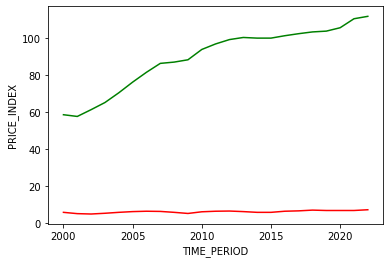

In [36]:
merge_FI = merge_df[merge_df["geo"] == "FI"]

sns.lineplot(x="TIME_PERIOD", y="PRICE_INDEX",color="green", data=merge_FI)
sns.lineplot(x="TIME_PERIOD", y="GDP_SPEND",color="red", data=merge_FI)

<AxesSubplot:xlabel='TIME_PERIOD', ylabel='PRICE_INDEX'>

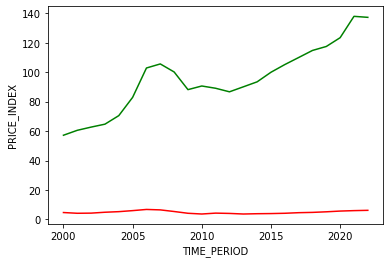

In [37]:
merge_DK = merge_df[merge_df["geo"] == "DK"]

sns.lineplot(x="TIME_PERIOD", y="PRICE_INDEX",color="green", data=merge_DK)
sns.lineplot(x="TIME_PERIOD", y="GDP_SPEND",color="red", data=merge_DK)

<AxesSubplot:xlabel='TIME_PERIOD', ylabel='PRICE_INDEX'>

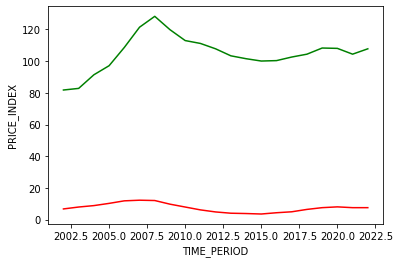

In [38]:
merge_CY = merge_df[merge_df["geo"] == "CY"]

sns.lineplot(x="TIME_PERIOD", y="PRICE_INDEX",color="green", data=merge_CY)
sns.lineplot(x="TIME_PERIOD", y="GDP_SPEND",color="red", data=merge_CY)

<AxesSubplot:xlabel='TIME_PERIOD', ylabel='PRICE_INDEX'>

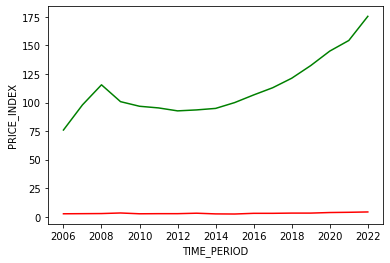

In [39]:
merge_SK = merge_df[merge_df["geo"] == "SK"]

sns.lineplot(x="TIME_PERIOD", y="PRICE_INDEX",color="green", data=merge_SK)
sns.lineplot(x="TIME_PERIOD", y="GDP_SPEND",color="red", data=merge_SK)

### Visualise countries of interest together

<AxesSubplot:xlabel='TIME_PERIOD', ylabel='PRICE_INDEX'>

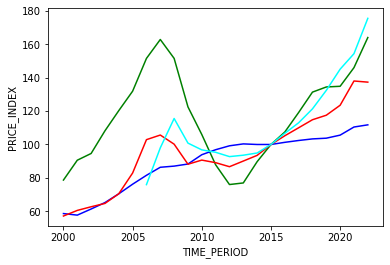

In [111]:

# colours were chosen to (approximately) represent colours present on national flags 

sns.lineplot(x="TIME_PERIOD", y="PRICE_INDEX",color="green", data=merge_IE)
sns.lineplot(x="TIME_PERIOD", y="PRICE_INDEX",color="blue", data=merge_FI)
sns.lineplot(x="TIME_PERIOD", y="PRICE_INDEX",color="red", data=merge_DK)
sns.lineplot(x="TIME_PERIOD", y="PRICE_INDEX",color="cyan", data=merge_SK)

<AxesSubplot:xlabel='TIME_PERIOD', ylabel='GDP_SPEND'>

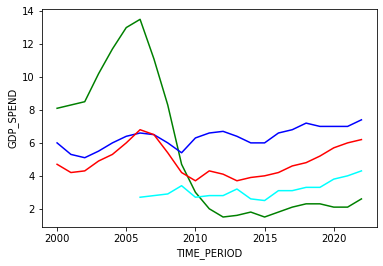

In [112]:
sns.lineplot(x="TIME_PERIOD", y="GDP_SPEND",color="green", data=merge_IE)
sns.lineplot(x="TIME_PERIOD", y="GDP_SPEND",color="blue", data=merge_FI)
sns.lineplot(x="TIME_PERIOD", y="GDP_SPEND",color="red", data=merge_DK)
sns.lineplot(x="TIME_PERIOD", y="GDP_SPEND",color="cyan", data=merge_SK)

### Isolate the most recent year for analysis

In [113]:
construction_2022 = merge_df[merge_df["TIME_PERIOD"] == 2022]

In [43]:
construction_2022.head()

,geo,TIME_PERIOD,GDP_SPEND,PRICE_INDEX
22,AT,2022,5.2,171.05
45,BE,2022,6.3,134.18
67,BG,2022,2.5,169.92
88,CY,2022,7.6,107.71
111,CZ,2022,4.8,215.30


<AxesSubplot:xlabel='GDP_SPEND', ylabel='Count'>

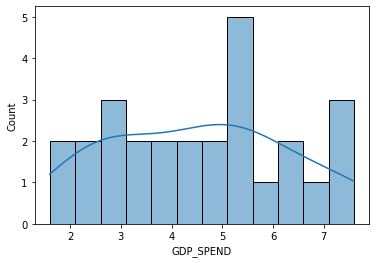

In [46]:
sns.histplot(data = construction_2022, x = "GDP_SPEND", binwidth = 0.5, kde=True)

<AxesSubplot:xlabel='PRICE_INDEX', ylabel='Count'>

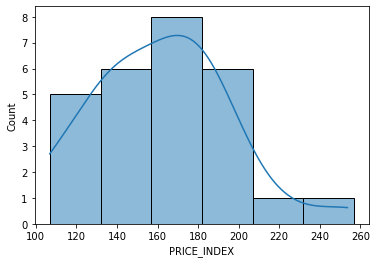

In [47]:
sns.histplot(data = construction_2022, x = "PRICE_INDEX", binwidth = 25, kde=True)

### Third and final dataset, completed construction projects

In [114]:
# initial viewing

ompletion = pd.read_csv("construction_completion.csv")
completion.info()
completion.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     958 non-null    object 
 1   LAST UPDATE  958 non-null    object 
 2   freq         958 non-null    object 
 3   indic_bt     958 non-null    object 
 4   nace_r2      958 non-null    object 
 5   s_adj        958 non-null    object 
 6   unit         958 non-null    object 
 7   geo          958 non-null    object 
 8   TIME_PERIOD  958 non-null    int64  
 9   OBS_VALUE    958 non-null    float64
 10  OBS_FLAG     95 non-null     object 
dtypes: float64(1), int64(1), object(9)
memory usage: 82.5+ KB


(958, 11)

In [50]:
completion.head()

,DATAFLOW,LAST UPDATE,freq,indic_bt,nace_r2,s_adj,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:STS_COPR_A(1.0),22/05/2023 11:00,A,PROD,F,CA,I15,AL,2005,49.8,NaN
1,ESTAT:STS_COPR_A(1.0),22/05/2023 11:00,A,PROD,F,CA,I15,AL,2006,50.6,NaN
2,ESTAT:STS_COPR_A(1.0),22/05/2023 11:00,A,PROD,F,CA,I15,AL,2007,53.7,NaN
3,ESTAT:STS_COPR_A(1.0),22/05/2023 11:00,A,PROD,F,CA,I15,AL,2008,84.0,NaN
4,ESTAT:STS_COPR_A(1.0),22/05/2023 11:00,A,PROD,F,CA,I15,AL,2009,120.7,NaN


In [115]:
#clean the dataframe in the same manner as the previous two

columns_to_drop = [0,1,2,3,4,5,6,10]
completion_drop = completion.drop(completion.columns[columns_to_drop], axis=1)

In [116]:
completion_drop.head()

,geo,TIME_PERIOD,OBS_VALUE
0,AL,2005,49.8
1,AL,2006,50.6
2,AL,2007,53.7
3,AL,2008,84.0
4,AL,2009,120.7


In [117]:
completion_drop = completion_drop.rename(columns={"OBS_VALUE": "COMPLETION"})

### Merge the three sources together

In [118]:
merge2_df = pd.merge(merge_df, completion_drop, how="left", on = ["geo", "TIME_PERIOD"])
merge2_df.info()
merge2_df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 0 to 583
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   geo          584 non-null    object 
 1   TIME_PERIOD  584 non-null    int64  
 2   GDP_SPEND    584 non-null    float64
 3   PRICE_INDEX  584 non-null    float64
 4   COMPLETION   584 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 27.4+ KB


(584, 5)

In [55]:
merge2_df.head()

,geo,TIME_PERIOD,GDP_SPEND,PRICE_INDEX,COMPLETION
0,AT,2000,5.3,60.36,77.0
1,AT,2001,4.9,60.82,76.5
2,AT,2002,4.6,61.21,76.9
3,AT,2003,4.4,61.36,86.3
4,AT,2004,4.4,60.21,90.7


In [56]:
merge2_df.describe()

,TIME_PERIOD,GDP_SPEND,PRICE_INDEX,COMPLETION
count,584.000000,584.000000,584.000000,584.000000
mean,2011.546233,4.494007,103.217449,120.584589
std,6.450332,2.097262,30.661723,62.494802
min,2000.000000,0.600000,29.330000,39.400000
25%,2006.000000,2.800000,87.452500,93.300000
50%,2012.000000,4.200000,100.685000,103.850000
75%,2017.000000,5.700000,118.602500,124.025000
max,2022.000000,13.500000,253.580000,650.900000


### Visualise the merged dataframe

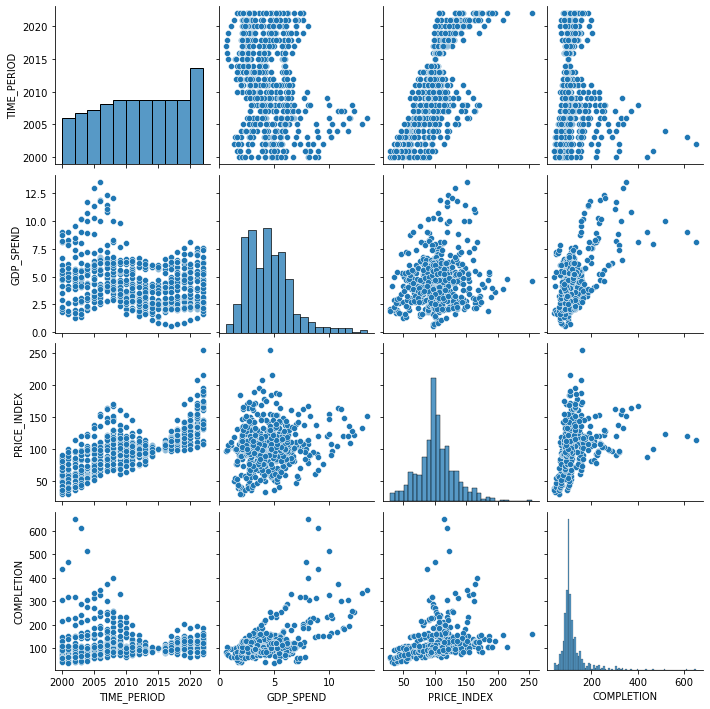

In [119]:
sns.pairplot(merge2_df)

<AxesSubplot:xlabel='GDP_SPEND', ylabel='PRICE_INDEX'>

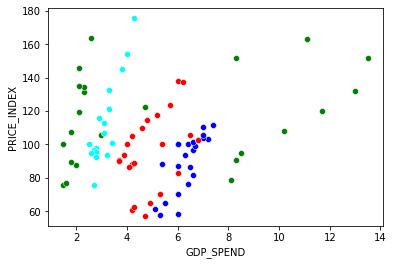

In [120]:
sns.scatterplot(x="GDP_SPEND", y="PRICE_INDEX",color="green", data=merge_IE)
sns.scatterplot(x="GDP_SPEND", y="PRICE_INDEX",color="blue", data=merge_FI)
sns.scatterplot(x="GDP_SPEND", y="PRICE_INDEX",color="red", data=merge_DK)
sns.scatterplot(x="GDP_SPEND", y="PRICE_INDEX",color="cyan", data=merge_SK)


In [126]:
merge2_IE = merge2_df[merge2_df["geo"] == "IE"]

<AxesSubplot:xlabel='GDP_SPEND', ylabel='COMPLETION'>

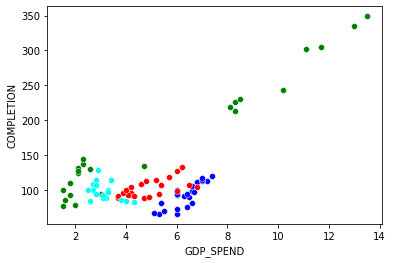

In [127]:
sns.scatterplot(x="GDP_SPEND", y="COMPLETION",color="green", data=merge2_IE)
sns.scatterplot(x="GDP_SPEND", y="COMPLETION",color="blue", data=merge2_FI)
sns.scatterplot(x="GDP_SPEND", y="COMPLETION",color="red", data=merge2_DK)
sns.scatterplot(x="GDP_SPEND", y="COMPLETION",color="cyan", data=merge2_SK)

# Regression Analysis


In [128]:
#import libraries

from sklearn import linear_model
from sklearn.metrics import r2_score
import numpy as np

### Initial view of GDP spend over time

In [66]:
X = merge2_df[['TIME_PERIOD','GDP_SPEND']]
y = merge2_df[['COMPLETION']]

<AxesSubplot:xlabel='TIME_PERIOD', ylabel='GDP_SPEND'>

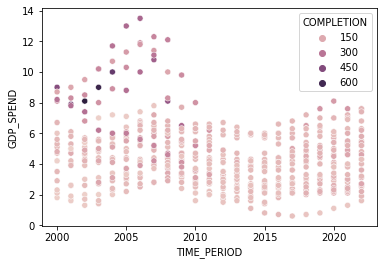

In [67]:
sns.scatterplot(x=merge2_df['TIME_PERIOD'], y=merge2_df['GDP_SPEND'], hue=merge2_df['COMPLETION'] )

In [68]:
reg_obj = linear_model.LinearRegression()

reg_obj.fit(X,y)

LinearRegression()

In [69]:
predicted_completion = reg_obj.predict([[2025,4.5]])
print("Predicted Completion : ")
print(predicted_completion)

Predicted Completion : 
[[117.7568163]]


In [70]:
# import the libraries for LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [71]:
# Call the train_test_split method to split the data and the default splitting is 75% for training and 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# Train the LinearRegression mode by using a method fit() function/ method
lr = LinearRegression().fit(X_train, y_train)

In [72]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((584, 2), (584, 1), (438, 2), (146, 2), (438, 1), (146, 1))

In [73]:
# Display the coefficient and intercept values
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [[-0.32167411 15.10298311]]
lr.intercept_: [698.59410616]


In [74]:
# Display the score values by calling lr
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.27
Test set score: 0.34


In [75]:
from sklearn.linear_model import Ridge

# Train the Ridge() mode by calling a fit() method
ridge = Ridge().fit(X_train, y_train)

# Display the score by using ridge object
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.27
Test set score: 0.34


In [76]:
# alpha = 10 is a parameter using a fit() method
ridge10 = Ridge(alpha = 10).fit(X_train, y_train)

# Display the score values for Ridge function
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.27
Test set score: 0.34


In [77]:
# alpha = 0.1 is a parameter using a fit() method
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

# Display the score values for Ridge function
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.27
Test set score: 0.34


### Investigation regression for Ireland in the same way as above

<AxesSubplot:xlabel='TIME_PERIOD', ylabel='GDP_SPEND'>

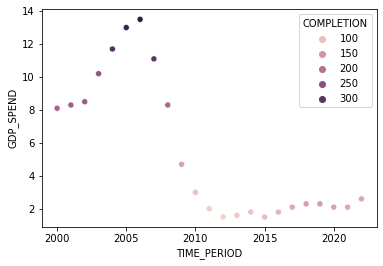

In [129]:
X = merge2_IE[['TIME_PERIOD','GDP_SPEND']]
y = merge2_IE[['COMPLETION']]

sns.scatterplot(x=merge2_IE['TIME_PERIOD'], y=merge2_IE['GDP_SPEND'], hue=merge2_IE['COMPLETION'] )

In [130]:
reg_obj = linear_model.LinearRegression()
reg_obj.fit(X,y)

predicted_completion = reg_obj.predict([[2023,2.6]])
print("Predicted Completion : ")
print(predicted_completion)


Predicted Completion : 
[[146.95805953]]


In [131]:
# Call the train_test_split method to split the data and the default splitting is 75% for training and 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# Train the LinearRegression mode by using a method fit() function/ method
lr = LinearRegression().fit(X_train, y_train)

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((23, 2), (23, 1), (17, 2), (6, 2), (17, 1), (6, 1))

In [132]:
# Display the coefficient and intercept values
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

# Display the score values by calling lr
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_: [[ 3.57669735 24.39148675]]
lr.intercept_: [-7150.46248569]
Training set score: 0.99
Test set score: 0.94


### And the same regression analysis for Finland

<AxesSubplot:xlabel='TIME_PERIOD', ylabel='GDP_SPEND'>

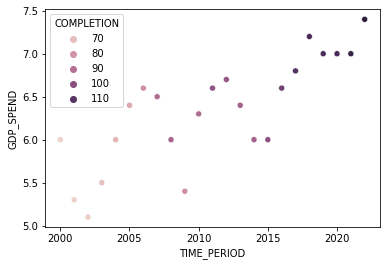

In [133]:
X = merge2_FI[['TIME_PERIOD','GDP_SPEND']]
y = merge2_FI[['COMPLETION']]

sns.scatterplot(x=merge2_FI['TIME_PERIOD'], y=merge2_FI['GDP_SPEND'], hue=merge2_FI['COMPLETION'] )

In [134]:
reg_obj = linear_model.LinearRegression()
reg_obj.fit(X,y)

predicted_completion = reg_obj.predict([[2023,7.4]])
print("Predicted Completion : ")
print(predicted_completion)


Predicted Completion : 
[[124.24349734]]


In [135]:
# Call the train_test_split method to split the data and the default splitting is 75% for training and 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# Train the LinearRegression mode by using a method fit() function/ method
lr = LinearRegression().fit(X_train, y_train)

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((23, 2), (23, 1), (17, 2), (6, 2), (17, 1), (6, 1))

In [136]:
# Display the coefficient and intercept values
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

# Display the score values by calling lr
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_: [[2.08208442 6.26898219]]
lr.intercept_: [-4134.86015388]
Training set score: 0.98
Test set score: 0.91


## Statistics

In [138]:
### focus on 2022 = set the index to countryname for easy of referencing
construction2_2022 = merge2_df[merge2_df["TIME_PERIOD"] == 2022]
construction2_2022.set_index('geo', inplace=True)
construction2_2022.head()

,TIME_PERIOD,GDP_SPEND,PRICE_INDEX,COMPLETION
geo,,,,
AT,2022,5.2,171.05,131.2
BE,2022,6.3,134.18,99.9
BG,2022,2.5,169.92,90.4
CY,2022,7.6,107.71,186.9
CZ,2022,4.8,215.30,107.6


In [139]:
# Do the same for 2020 for comparison

construction2_2020 = merge2_df[merge2_df["TIME_PERIOD"] == 2020]
construction2_2020.set_index('geo', inplace=True)
construction2_2020.head()

,TIME_PERIOD,GDP_SPEND,PRICE_INDEX,COMPLETION
geo,,,,
AT,2020,5.0,136.31,117.9
BE,2020,6.1,118.60,94.4
BG,2020,2.9,137.41,87.3
CY,2020,8.1,107.98,188.7
CZ,2020,4.6,153.90,102.5


### Visualise the data

<AxesSubplot:xlabel='PRICE_INDEX', ylabel='Count'>

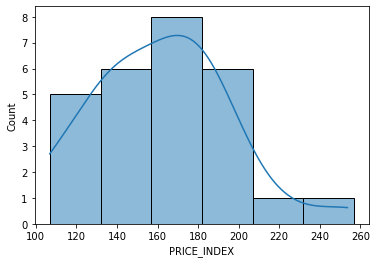

In [141]:
sns.histplot(data = construction2_2022, x = "PRICE_INDEX", binwidth = 25, kde=True)

<AxesSubplot:xlabel='GDP_SPEND', ylabel='Count'>

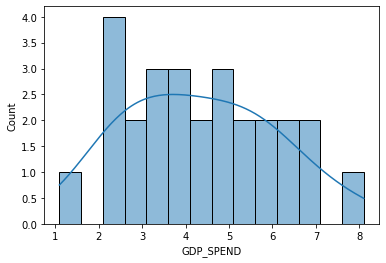

In [142]:
sns.histplot(data = construction2_2020, x = "GDP_SPEND", binwidth = 0.5, kde=True)

<AxesSubplot:xlabel='COMPLETION', ylabel='Count'>

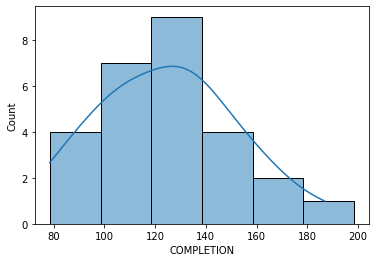

In [143]:
sns.histplot(data = construction2_2022, x = "COMPLETION", binwidth = 20, kde=True)

### Analyse for normal distribution, and run t-tests

In [153]:
# load the required library
from scipy import stats


# function to test the p_value, and return a statement of whether it is normal
def shapiro(data, alpha = 0.05):

    statistics, p_value = stats.shapiro(data)

 
    if p_value > alpha:
        print("The data is normally distributed")
    else:
        print("The data is not normally distributed")


In [154]:
data = construction2_2022['COMPLETION']
shapiro(data)

The data is normally distributed


In [147]:
data = construction2_2022['PRICE_INDEX']
shapiro(data)

The data is normally distributed


In [150]:
data = construction2_2022['GDP_SPEND']
shapiro(data)


The data is normally distributed


### Compare Ireland's GDP spend with others

In [155]:
# function for hypothesis testing - is the value for a particular country significantly 
# higher or lower than the EU mean?

def ttests(data, null_mean, alpha = 0.05):
    
    statistics, p_value = stats.ttest_1samp(data, null_mean)

    if p_value < alpha/2:
        print("The mean is significantly lower")
    elif p_value > 1 - alpha/2:
        print("The mean is significantly higher")
    else:
        print("The mean is not significantly different")


In [156]:
data = construction2_2022['GDP_SPEND']
null_mean = construction2_2022.loc["IE","GDP_SPEND"]

ttests(data, null_mean)

The mean is significantly lower


In [157]:
data = construction2_2022['PRICE_INDEX']
null_mean = construction2_2022.loc["IE","PRICE_INDEX"]

ttests(data, null_mean)

The mean is not significantly different


In [158]:
data = construction2_2022['PRICE_INDEX']
null_mean = construction2_2022.loc["FI","PRICE_INDEX"]

ttests(data, null_mean)

The mean is significantly lower


In [159]:
data = construction2_2022['COMPLETION']
null_mean = construction2_2022.loc["IE","COMPLETION"]

ttests(data, null_mean)

The mean is not significantly different


In [160]:
data = construction2_2022['COMPLETION']
null_mean = construction2_2022.loc["FI","COMPLETION"]

ttests(data, null_mean)

The mean is not significantly different


In [161]:
data = construction2_2022['COMPLETION']
null_mean = construction2_2022.loc["SK","COMPLETION"]

ttests(data, null_mean)

The mean is significantly lower


In [162]:
data = construction2_2022['COMPLETION']
null_mean = construction2_2022.loc["DK","COMPLETION"]

ttests(data, null_mean)

The mean is not significantly different


In [163]:
data = construction2_2022['PRICE_INDEX']
null_mean = construction2_2022.loc["SK","PRICE_INDEX"]

ttests(data, null_mean)

The mean is not significantly different


In [164]:
data = construction2_2022['PRICE_INDEX']
null_mean = construction2_2022.loc["DK","PRICE_INDEX"]

ttests(data, null_mean)

The mean is significantly lower
